##  Classification



* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month.


In [0]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [237]:
## Use this for consistency in graphs through out the notebook
import re
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [51]:
#Part 1 : Data Exploration

df1 = pd.read_excel("default of credit card clients.xls", skiprows = 1,header = 0)

In [52]:
df1.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [20]:
df = df1.copy()

In [21]:
df.shape

(30000, 25)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [22]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [23]:
df.sample(10,random_state=0)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
8225    8226      20000    1          1         2   33      1      2      2   
10794  10795      20000    2          2         2   35      0      0      2   
9163    9164     230000    2          1         1   44      1     -1     -1   
26591  26592     100000    1          2         1   42      0      0      0   
6631    6632     150000    1          1         2   29     -2     -2     -2   
14161  14162      50000    1          2         2   25     -1      3      2   
252      253     140000    2          2         2   26      0      0      0   
2566    2567     280000    1          1         2   31      1     -1     -1   
3478    3479     500000    2          1         2   36     -1     -1     -1   
2917    2918     310000    2          2         1   44     -1     -1     -2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
8225       2  ...      18453      19755      19288         0      2260   
10794      0  ...      19000      19000      20000      3400         0   
9163      -1  ...        933          0          0       949      2873   
26591      0  ...      17758      18774      20272      5000      2000   
6631      -2  ...       6469       5138       7810      6989       833   
14161      0  ...       9993      15300          0         0         0   
252        0  ...     105334     107699     106828      5366      5087   
2566       0  ...       2001       -339      -1180      3495      2783   
3478      -1  ...       3338       1224      31022      4081      4283   
2917      -2  ...          0          0          0         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
8225          0      1600         0       644                           0  
10794      1000         0      1000         0                           0  
9163        933         0         0         0                           0  
26591      2000      2000      2000      2000                           0  
6631       6488      5153      7833      7130                           0  
14161       200      5307         0         0                           1  
252        3605      3894      3785      3304                           1  
2566          0         0         0         0                           0  
3478       3338      1224     31022      1088                           0  
2917          0         0         0         0                           0  

[10 rows x 25 columns]

In [24]:
#Missing values check
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [63]:
df = df.rename(columns={'default payment next month': 'default'})

In [64]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

In [65]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [66]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [67]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [68]:
df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [69]:
df.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [70]:
df.BILL_AMT1.unique()

array([ 3913,  2682, 29239, ...,  1683, -1645, 47929], dtype=int64)

In [71]:
df.default.unique()

array([1, 0], dtype=int64)

In [72]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       default  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

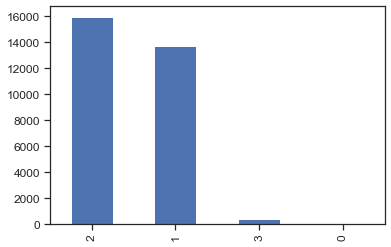

In [73]:
df['MARRIAGE'].value_counts().plot.bar()

The graph shows that single people are more than married people, lastly followed by other. 

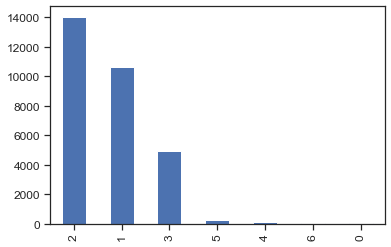

In [74]:
df['EDUCATION'].value_counts().plot.bar()

University students are the most in number, followed by graduates students, high school and then others. 

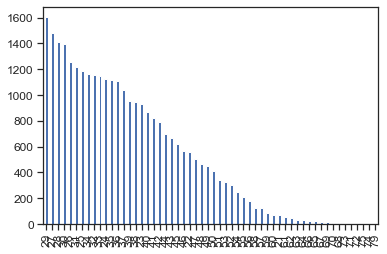

In [75]:
df['AGE'].value_counts().plot.bar()

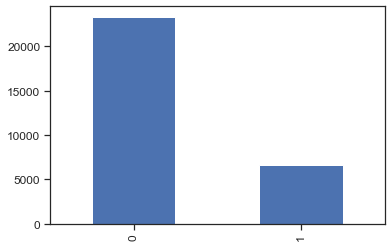

In [77]:
df['default'].value_counts().plot.bar()

Number of no category default is more than yes category default

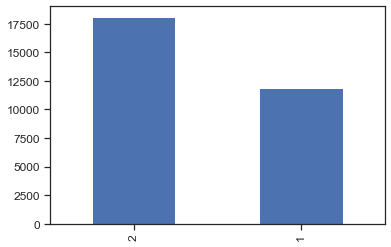

In [78]:
df['SEX'].value_counts().plot.bar()

Number of females are using the credit more than the male in the dataset. 

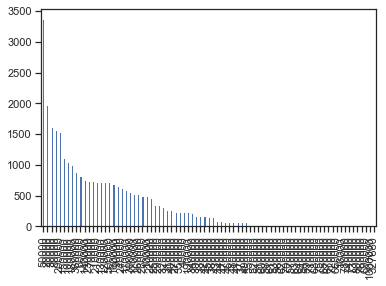

In [86]:
df['LIMIT_BAL'].value_counts().plot.bar()

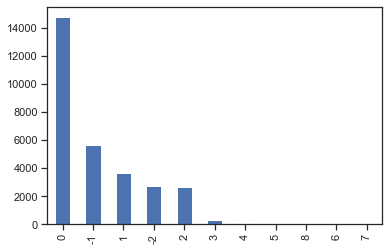

In [89]:
df['PAY_0'].value_counts().plot.bar()

Based on the graph use of revovlving credit is most used followed by full payment done, then no use of credit and finally payment delay for 2 months. Pay_0 is repayment status in september 2005

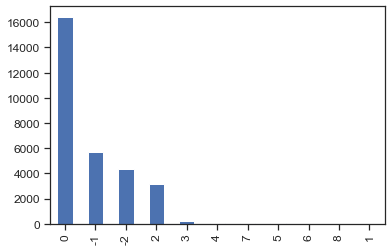

In [265]:
df['PAY_4'].value_counts().plot.bar()

Similarly, Pay_4 graph shows use of revovling credit is the most used followed by full payment done for that month, followed by no use of credit that month, similary delay by 2 month is also there. Pay_4 corresponds to repayment status in June 2006

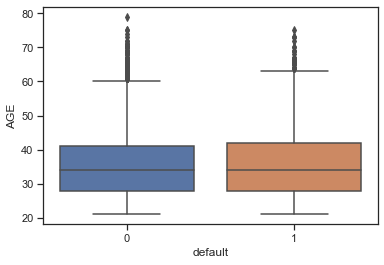

In [97]:
sns.boxplot(data=df, x='default', y='AGE')
plt.show()

In boxplot age is between 28 to 40 for both the groups of defaulted on the payment as well not defaulted on the payment. For not defaulting on the payment there is bit of a spread in the age group. The spread for defaulting on payment is less. 

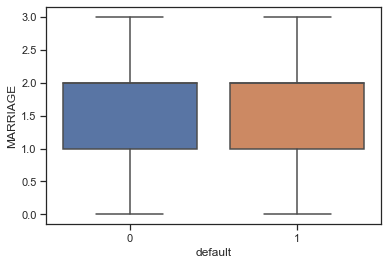

In [98]:
sns.boxplot(data=df, x='default', y='MARRIAGE')
plt.show()

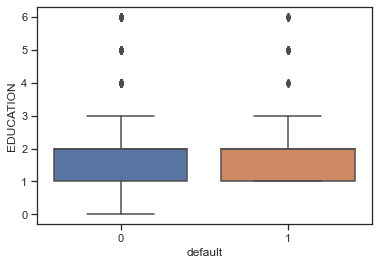

In [99]:
sns.boxplot(data=df, x='default', y='EDUCATION')
plt.show()

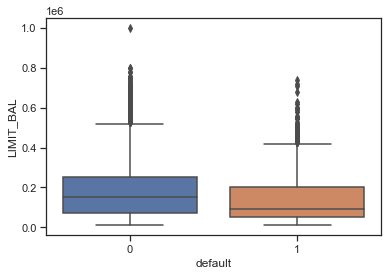

In [100]:
sns.boxplot(data=df, x='default', y='LIMIT_BAL')
plt.show()

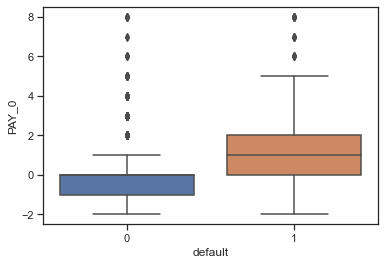

In [101]:
sns.boxplot(data=df, x='default', y='PAY_0')
plt.show()

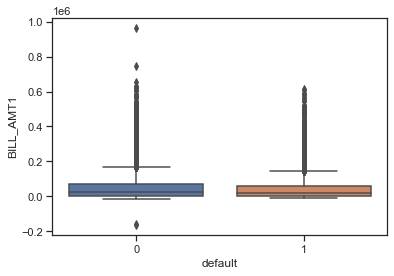

In [102]:
sns.boxplot(data=df, x='default', y='BILL_AMT1')
plt.show()

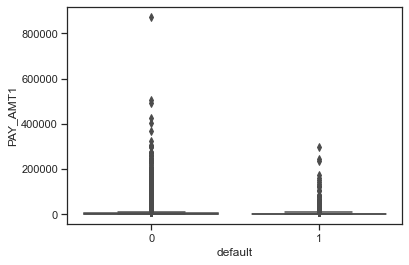

In [103]:
sns.boxplot(data=df, x='default', y='PAY_AMT1')
plt.show()

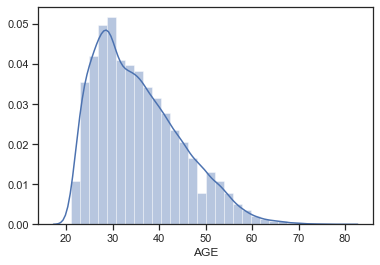

In [85]:
sns.distplot(df['AGE'],kde=True,bins=30)

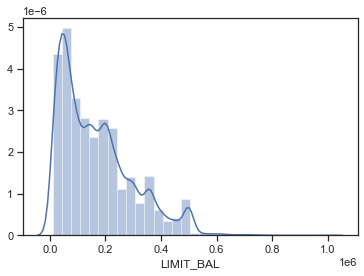

In [87]:
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)

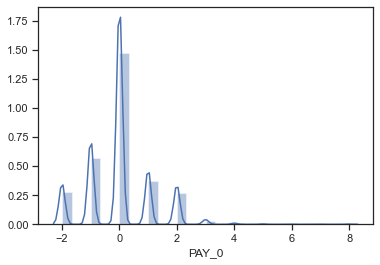

In [104]:
sns.distplot(df['PAY_0'],kde=True,bins=30)

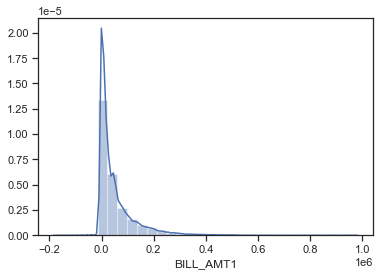

In [105]:
sns.distplot(df['BILL_AMT1'],kde=True,bins=30)

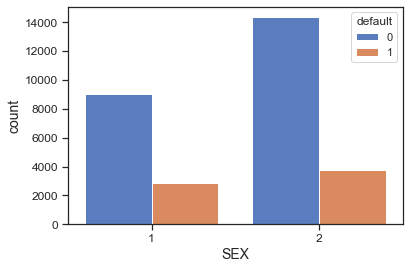

In [79]:
sns.countplot(x='SEX', data=df,hue="default", palette="muted")

The graph show that more women are using the credit than men. More woment are not defaulting on the payment.

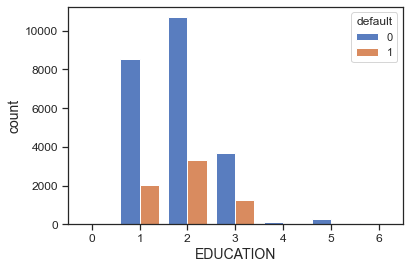

In [80]:
sns.countplot(x='EDUCATION',data=df,hue="default",palette="muted")

Similary university student are using the most credit, but did not default on there payment. 

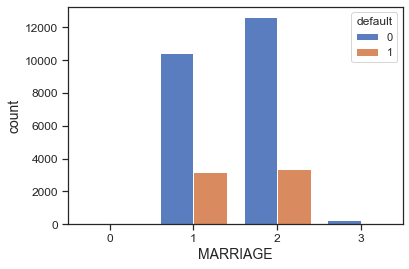

In [81]:
sns.countplot(x='MARRIAGE',data=df,hue="default", palette="muted")

Similary single's are not defaulting on there payment.

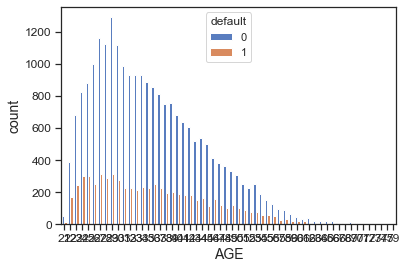

In [82]:
sns.countplot(x='AGE',data=df,hue="default", palette="muted")

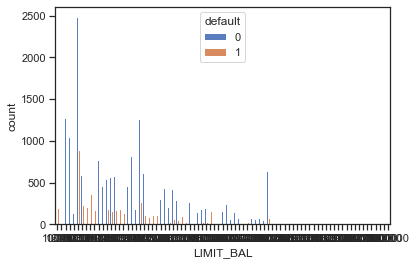

In [93]:
sns.countplot(x='LIMIT_BAL',data=df,hue="default", palette="muted")

<Figure size 1440x1440 with 0 Axes>

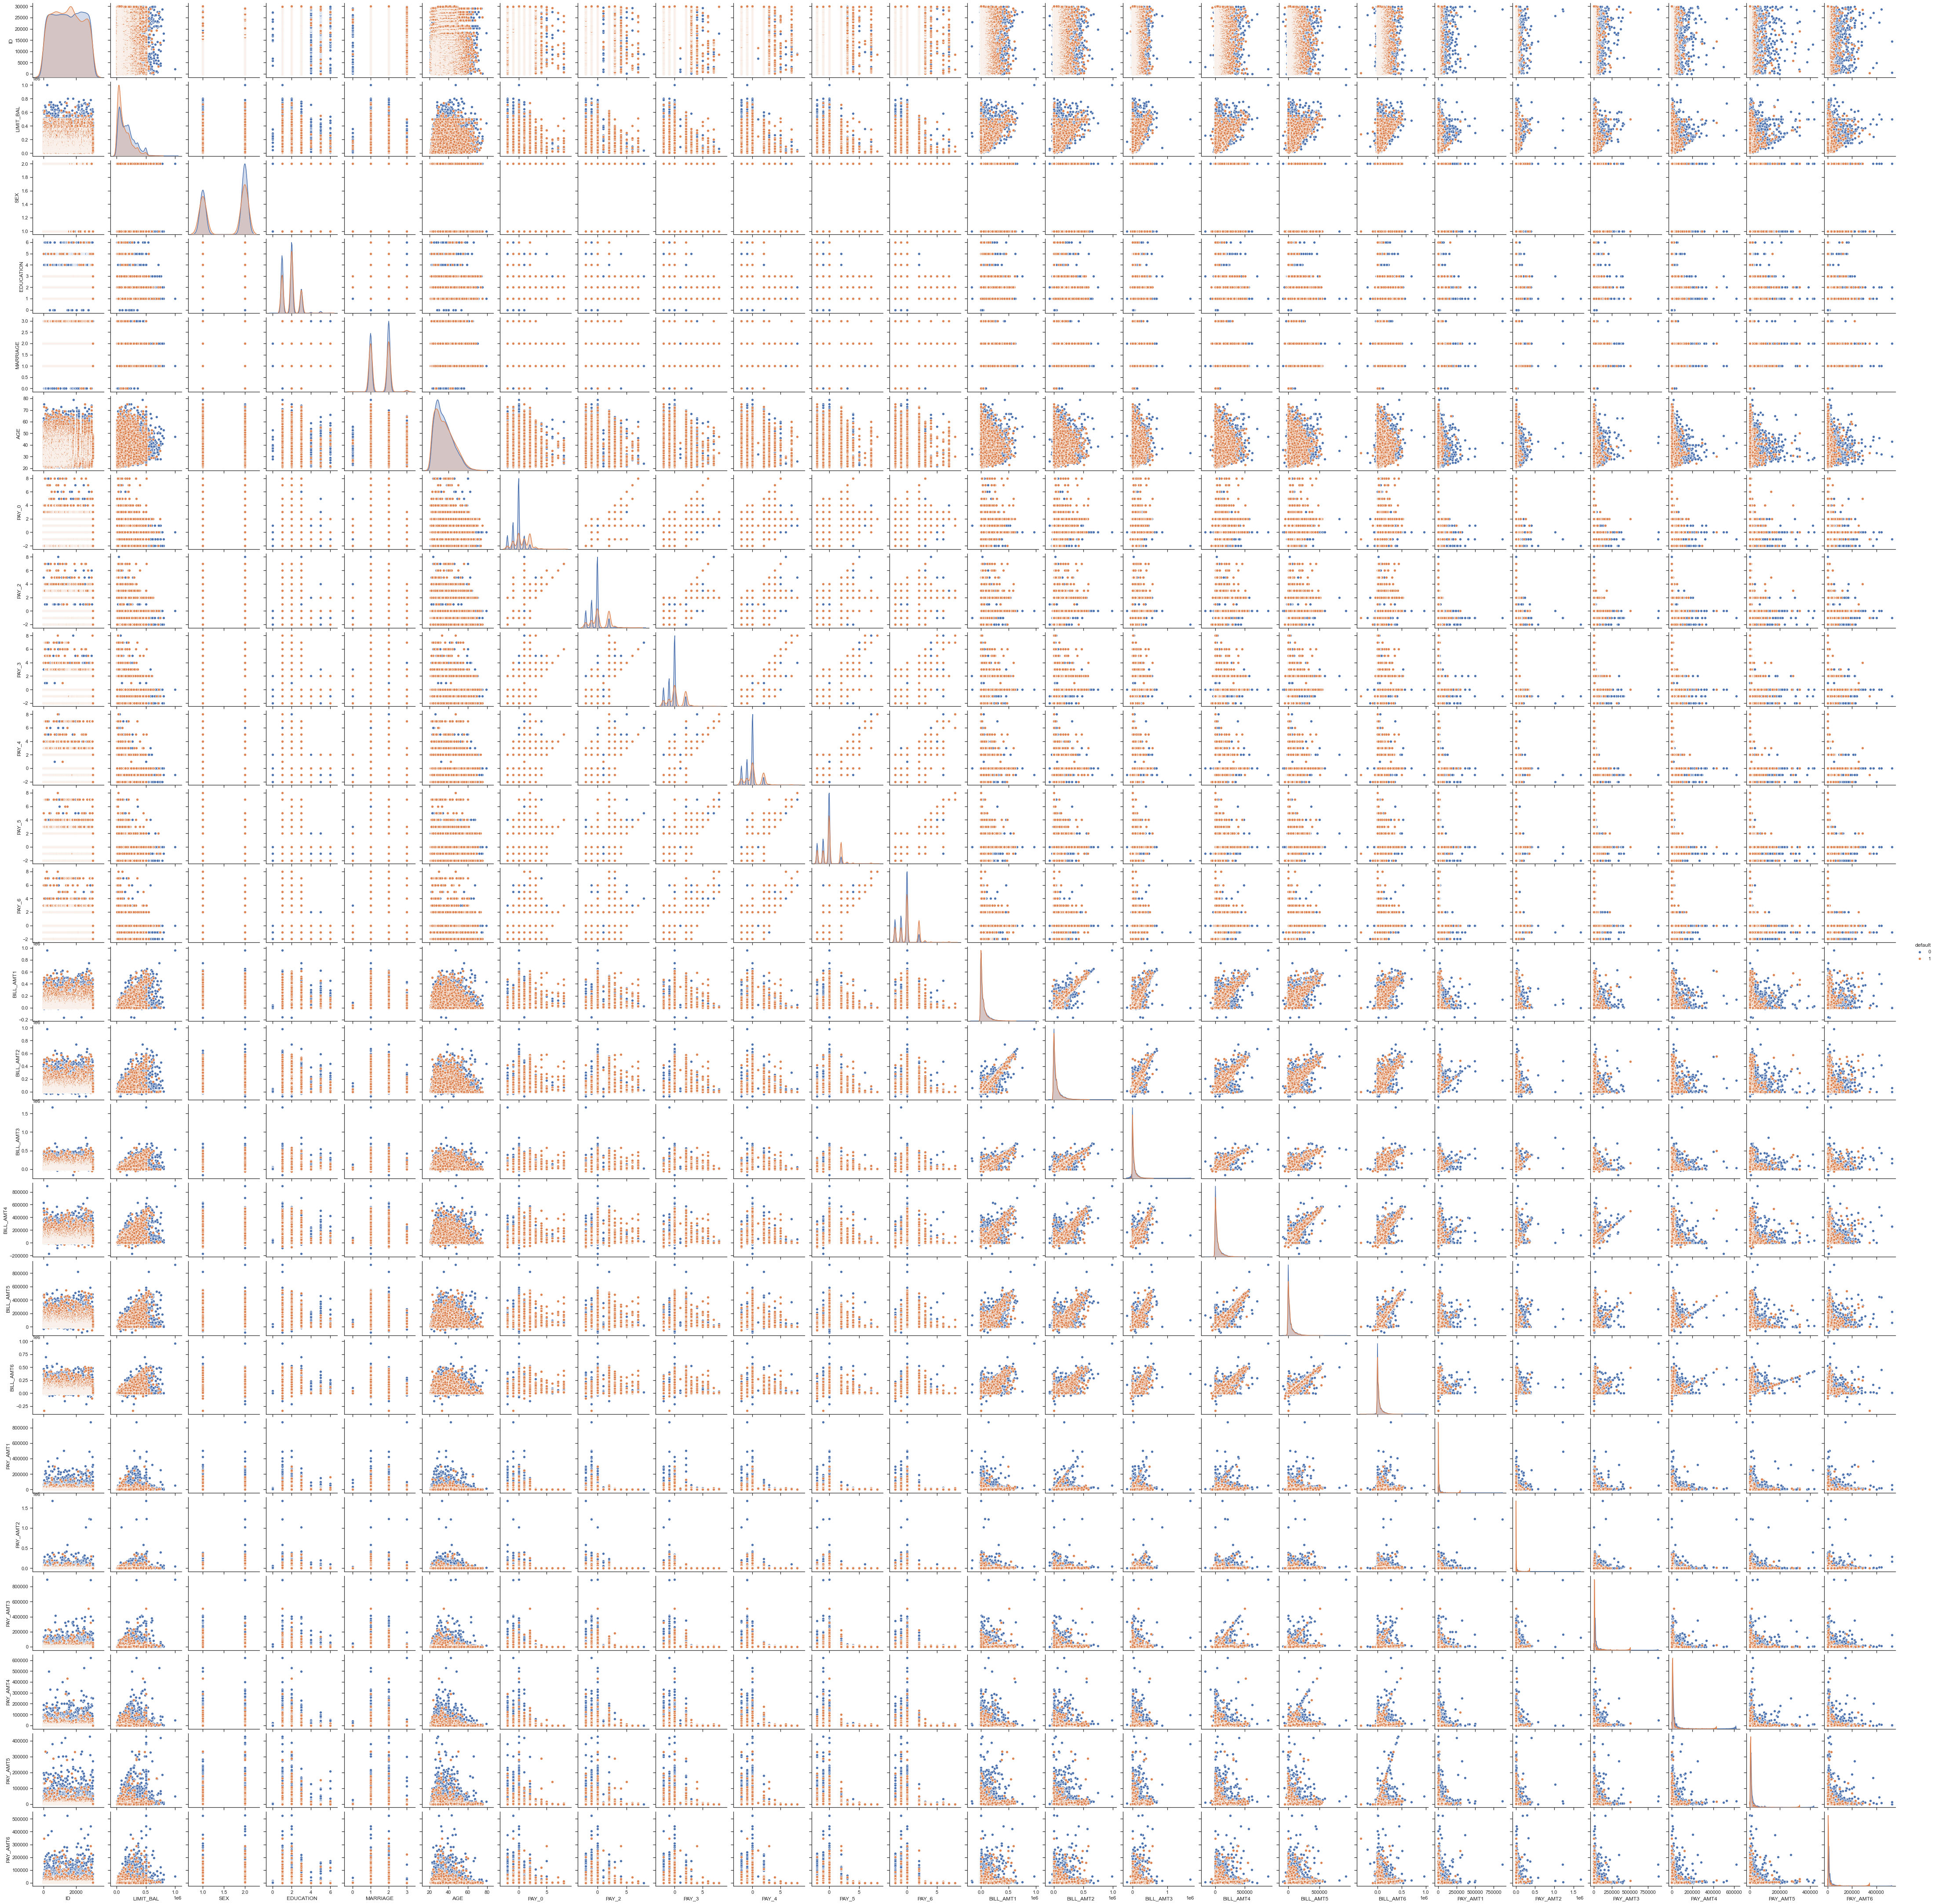

In [83]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='default')

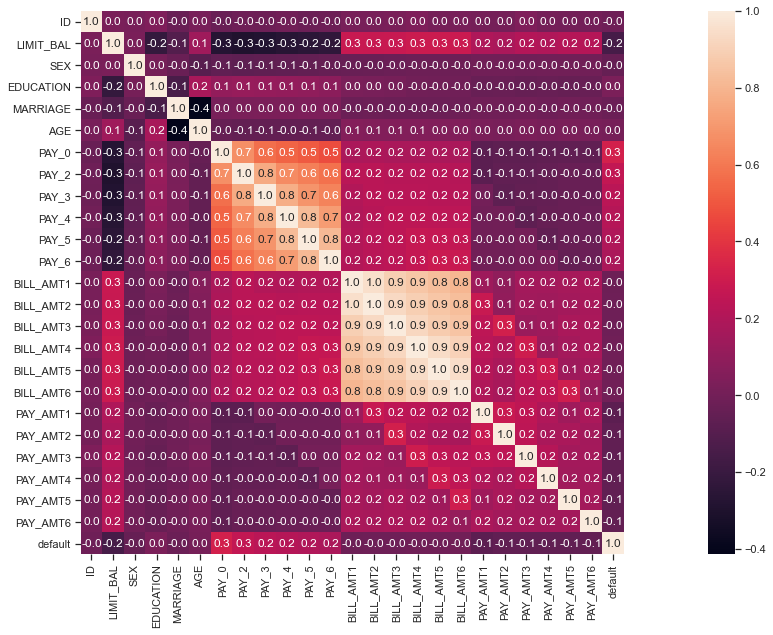

In [91]:
correlation = df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" ) 

Heat Map shows PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 are correleated with default payments.

In [106]:
df.groupby('default')['PAY_0'].count()


default
0    23364
1     6636
Name: PAY_0, dtype: int64

In [111]:
df.groupby('default')['PAY_2'].count()

default
0    23364
1     6636
Name: PAY_2, dtype: int64

In [112]:
df.groupby('default')['PAY_3'].count()

default
0    23364
1     6636
Name: PAY_3, dtype: int64

In [113]:
df.groupby('default')['BILL_AMT1'].count()

default
0    23364
1     6636
Name: BILL_AMT1, dtype: int64

In [115]:
df.groupby('default')['MARRIAGE'].count()

default
0    23364
1     6636
Name: MARRIAGE, dtype: int64

In [116]:
df.groupby('default')['EDUCATION'].count()

default
0    23364
1     6636
Name: EDUCATION, dtype: int64

In [117]:
df.groupby('default')['SEX'].count()

default
0    23364
1     6636
Name: SEX, dtype: int64

In [118]:
df.groupby('default')['LIMIT_BAL'].count()

default
0    23364
1     6636
Name: LIMIT_BAL, dtype: int64

In [129]:
df.groupby(['SEX','MARRIAGE','EDUCATION','AGE','default'])['PAY_2'].mean().sort_values(ascending=False)

SEX  MARRIAGE  EDUCATION  AGE  default
1    0         3          29   0          4.0
     3         3          44   1          4.0
2    2         3          63   1          3.0
     1         3          21   1          3.0
1    2         2          58   1          3.0
                                         ... 
2    1         5          49   0         -2.0
               1          59   1         -2.0
     2         4          36   0         -2.0
                          31   0         -2.0
     1         2          73   1         -2.0
Name: PAY_2, Length: 1520, dtype: float64

In [123]:
df.corr()

ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION  0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0     -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT1  0.019389   0.285430 -0.033642   0.023581 -0.023472  0.056239   
BILL_AMT2  0.017982   0.278314 -0.031183   0.018749 -0.021602  0.054283   
BILL_AMT3  0.024354   0.283236 -0.024563   0.013002 -0.024909  0.053710   
BILL_AMT4  0.040351   0.293988 -0.021880  -0.000451 -0.023344  0.051353   
BILL_AMT5  0.016705   0.295562 -0.017005  -0.007567 -0.025393  0.049345   
BILL_AMT6  0.016730   0.290389 -0.016733  -0.009099 -0.021207  0.047613   
PAY_AMT1   0.009742   0.195236 -0.000242  -0.037456 -0.005979  0.026147   
PAY_AMT2   0.008406   0.178408 -0.001391  -0.030038 -0.008093  0.021785   
PAY_AMT3   0.039151   0.210167 -0.008597  -0.039943 -0.003541  0.029247   
PAY_AMT4   0.007793   0.203242 -0.002229  -0.038218 -0.012659  0.021379   
PAY_AMT5   0.000652   0.217202 -0.001667  -0.040358 -0.001205  0.022850   
PAY_AMT6   0.003000   0.219595 -0.002766  -0.037200 -0.006641  0.019478   
default   -0.013952  -0.153520 -0.039961   0.028006 -0.024339  0.013890   

              PAY_0     PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  \
ID        -0.030575 -0.011215 -0.018494 -0.002735  ...   0.040351   0.016705   
LIMIT_BAL -0.271214 -0.296382 -0.286123 -0.267460  ...   0.293988   0.295562   
SEX       -0.057643 -0.070771 -0.066096 -0.060173  ...  -0.021880  -0.017005   
EDUCATION  0.105364  0.121566  0.114025  0.108793  ...  -0.000451  -0.007567   
MARRIAGE   0.019917  0.024199  0.032688  0.033122  ...  -0.023344  -0.025393   
AGE       -0.039447 -0.050148 -0.053048 -0.049722  ...   0.051353   0.049345   
PAY_0      1.000000  0.672164  0.574245  0.538841  ...   0.179125   0.180635   
PAY_2      0.672164  1.000000  0.766552  0.662067  ...   0.222237   0.221348   
PAY_3      0.574245  0.766552  1.000000  0.777359  ...   0.227202   0.225145   
PAY_4      0.538841  0.662067  0.777359  1.000000  ...   0.245917   0.242902   
PAY_5      0.509426  0.622780  0.686775  0.819835  ...   0.271915   0.269783   
PAY_6      0.474553  0.575501  0.632684  0.716449  ...   0.266356   0.290894   
BILL_AMT1  0.187068  0.234887  0.208473  0.202812  ...   0.860272   0.829779   
BILL_AMT2  0.189859  0.235257  0.237295  0.225816  ...   0.892482   0.859778   
BILL_AMT3  0.179785  0.224146  0.227494  0.244983  ...   0.923969   0.883910   
BILL_AMT4  0.179125  0.222237  0.227202  0.245917  ...   1.000000   0.940134   
BILL_AMT5  0.180635  0.221348  0.225145  0.242902  ...   0.940134   1.000000   
BILL_AMT6  0.176980  0.219403  0.222327  0.239154  ...   0.900941   0.946197   
PAY_AMT1  -0.079269 -0.080701  0.001295 -0.009362  ...   0.233012   0.217031   
PAY_AMT2  -0.070101 -0.058990 -0.066793 -0.001944  ...   0.207564   0.181246   
PAY_AMT3  -0.070561 -0.055901 -0.053311 -0.069235  ...   0.300023   0.252305   
PAY_AMT4  -0.064005 -0.046858 -0.046067 -0.043461  ...   0.130191   0.293118   
PAY_AMT5  -0.058190 -0.037093 -0.035863 -0.033590  ...   0.160433   0.141574   
PAY_AMT6  -0.058673 -0.036500 -0.035861 -0.026565  ...   0.177637   0.164184   
default    0.324794  0.263551  0.235253  0.216614  ...  -0.010156 

In [139]:
#Part 2: Data Preprocessing

# data types
categorical_vars = ['SEX','EDUCATION','MARRIAGE']
discrete_vars = ['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
dep_var = ['default']

In [238]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [160]:
#categorical - one hot encode
cat_ohe_step = ( 'ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))
cat_steps =[cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe,categorical_vars)]

In [149]:
#numerical - scale
num_sci_step = ('scl', MinMaxScaler())
num_steps = [num_sci_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars)]

In [151]:
#pipeline to transform our data
ct = ColumnTransformer(transformers=cat_transformers+num_transformers)
ct.fit(df[categorical_vars + discrete_vars])
X = ct.transform(df[categorical_vars + discrete_vars])

y = df[['default']].values


In [153]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 32)
(6000, 32)
(24000, 1)
(6000, 1)


In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

rfr = ElasticNet()
scores = cross_val_score(rfr,X,np.ravel(y),cv=5,scoring='neg_mean_squared_error')


In [164]:
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:",np.sqrt(-scores).mean())
    print('Standard deviation:',np.sqrt(-scores).std())
    
display_scores(scores)    

Scores: [0.41346591 0.42097625 0.42964701 0.40309759 0.40821754]
Mean: 0.4150808603984471
Standard deviation: 0.009383393889467788


In [166]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)
scores = cross_val_score(rfr,X,np.ravel(y),cv=5,scoring='neg_mean_squared_error')
display_scores(scores)


Scores: [0.41346591 0.42097625 0.42964701 0.40309759 0.40821754]
Mean: 0.4150808603984471
Standard deviation: 0.009383393889467788


In [217]:
#Random Forest Classifier
clf=RandomForestClassifier()
cv_scores = cross_val_score(clf,X_train,np.ravel(y_train),cv=5)
print(cv_scores)
print(cv_scores.mean())


[0.815625   0.81625    0.80958333 0.81333333 0.81333333]
0.813625


In [ ]:
#Part 3: Classification

In [264]:
#Random Forest Classifier
clf=RandomForestClassifier()
cv_scores = cross_val_score(clf,X_train,np.ravel(y_train),cv=5)
print(cv_scores)
print(cv_scores.mean())


[0.81208333 0.82291667 0.808125   0.81041667 0.81333333]
0.8133750000000001


In [184]:
#hyperparameter 

param_grid = {
    'n_estimators': [4,5,10,20,50] ,
    'max_depth': [2, 5] 

}

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf,
                          param_grid=param_grid,
                          cv=5,
                          verbose=3)
#last we fit our data
grid_search.fit(X_train,np.ravel(y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=2, n_estimators=4 .....................................
[CV] ......... max_depth=2, n_estimators=4, score=0.795, total=   0.1s
[CV] max_depth=2, n_estimators=4 .....................................
[CV] ......... max_depth=2, n_estimators=4, score=0.799, total=   0.0s
[CV] max_depth=2, n_estimators=4 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ......... max_depth=2, n_estimators=4, score=0.799, total=   0.1s
[CV] max_depth=2, n_estimators=4 .....................................
[CV] ......... max_depth=2, n_estimators=4, score=0.815, total=   0.0s
[CV] max_depth=2, n_estimators=4 .....................................
[CV] ......... max_depth=2, n_estimators=4, score=0.804, total=   0.1s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.796, total=   0.1s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.805, total=   0.1s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.798, total=   0.1s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.807, total=   0.1s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5],
                         'n_estimators': [4, 5, 10, 20, 50]},
             verbose=3)

In [212]:
print ( grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 20}


In [186]:
print("\n",grid_search.best_estimator_)


 RandomForestClassifier(max_depth=5, n_estimators=20)


In [187]:
final_model = grid_search.best_estimator_
print(final_model, X_test, np.ravel(y_test))

RandomForestClassifier(max_depth=5, n_estimators=20) [[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.57648953e-03
  0.00000000e+00 1.21816043e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.34450647e-03 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.41545894e-03
  3.23541893e-04 1.11601654e-04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.68901294e-03 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.48631240e-03
  6.59744121e-03 5.84300863e-03]] [0 0 0 ... 1 0 0]


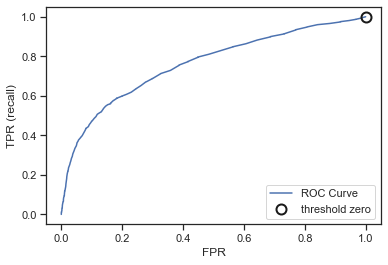

In [194]:
from sklearn.metrics import roc_curve
final_model=RandomForestClassifier().fit(X_train,np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), final_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [218]:
#knn classifier
clf2 =  knnc()
cv_scores2 = cross_val_score(clf2,X_train,np.ravel(y_train),cv=5)
print(cv_scores2)
print(cv_scores2.mean())


[0.78916667 0.80145833 0.79458333 0.78854167 0.795     ]
0.79375


In [209]:
#hyperparameter

param_grid = {
    'n_neighbors': [3,5,10,20],
    'leaf_size': [1,30]
}

clf2 = knnc()

grid_search2 = GridSearchCV(estimator=clf2,
                            param_grid=param_grid,
                            cv=5)

#last we fit our data
grid_search2.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 30], 'n_neighbors': [3, 5, 10, 20]})

In [211]:
print(grid_search2.best_params_)

{'leaf_size': 30, 'n_neighbors': 20}


In [210]:
print("\n",grid_search2.best_estimator_)


 KNeighborsClassifier(n_neighbors=20)


In [226]:
final_model2 = grid_search2.best_estimator_
print(final_model2, X_test, np.ravel(y_test))


KNeighborsClassifier(n_neighbors=20) [[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.57648953e-03
  0.00000000e+00 1.21816043e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.34450647e-03 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.41545894e-03
  3.23541893e-04 1.11601654e-04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.68901294e-03 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.48631240e-03
  6.59744121e-03 5.84300863e-03]] [0 0 0 ... 1 0 0]


test accuracy for kncc : 80.9 %


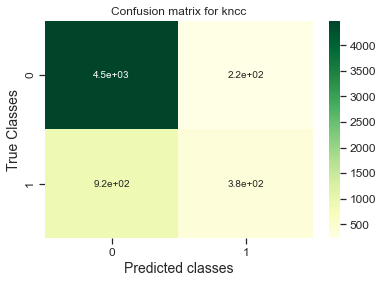

test accuracy for Random Forest Classifier: 82.07 %


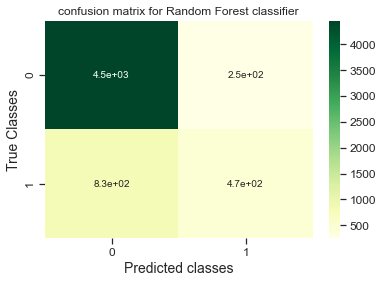

In [266]:
y_hat_kncc = final_model2.predict(X_test)
y_hat_RandomForestClassifer = final_model.predict(X_test)

print('test accuracy for kncc :'\
      , round(accuracy_score(np.ravel(y_test), y_hat_kncc)*100, 2), '%')
plt.title('Confusion matrix for kncc')
sns.heatmap(confusion_matrix(np.ravel(y_test), y_hat_kncc), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for Random Forest Classifier:', \
      round(accuracy_score(np.ravel(y_test), y_hat_RandomForestClassifer)*100, 2),'%')
plt.title('confusion matrix for Random Forest classifier')
sns.heatmap(confusion_matrix(np.ravel(y_test), y_hat_RandomForestClassifer), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

 Observations: 
As shown above random forest classifer has slightly better accuracy than knearest neighbour. Comparing the the
false positive and false negatives, random forest classifier has more false positives than knearest neighbour. However, 
knearest neighbour has more false negative. Meaning random forest classifier prediction overall is bette than kncc.

In [247]:
#Random Forest Classifier ROC_AUC_SCORE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_probs = final_model.predict_proba(X_test)
rfc_probs = rfc_probs[:,1]
rfc_auc = roc_auc_score(np.ravel(y_test), rfc_probs)
print('Random Forest Classifier:ROC_AUC=%.3f'% (rfc_auc))

Random Forest Classifier:ROC_AUC=0.761


In [245]:
#Knearest neighbour ROC_AUC_SCORE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_probs = final_model2.predict_proba(X_test)
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(np.ravel(y_test), knn_probs)
print('Knearest:ROC_AUC=%.3f'% (knn_auc))

Knearest:ROC_AUC=0.752


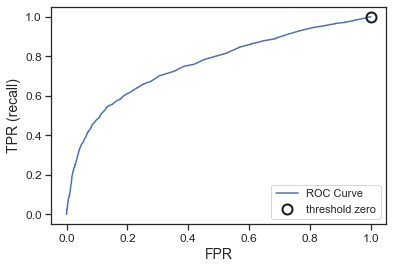

In [248]:
#ROC Curve for Random Forest Classifier

from sklearn.metrics import roc_curve
final_model=RandomForestClassifier().fit(X_train,np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), final_model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [253]:
print(thresholds)

[2.         1.         0.99       0.986      0.98       0.96
 0.95166667 0.95       0.94095238 0.94       0.93916667 0.934
 0.93       0.9275     0.9207409  0.92       0.91       0.90940568
 0.9055     0.9        0.89       0.88083333 0.88       0.87666667
 0.8735     0.87       0.865      0.86       0.85904437 0.85533333
 0.85208333 0.85       0.84366667 0.84       0.83       0.82916667
 0.82       0.81       0.80666667 0.80294392 0.8        0.7945
 0.79       0.78802381 0.7857033  0.78       0.77       0.7675
 0.76       0.75       0.74       0.73551587 0.73       0.72
 0.71       0.70190476 0.7        0.6995     0.69909524 0.69
 0.68052381 0.68       0.67508333 0.67       0.66       0.65527778
 0.65169048 0.65       0.64       0.64       0.63       0.62
 0.61666667 0.615      0.61       0.6        0.59033333 0.59
 0.58       0.57       0.5625     0.56       0.55       0.54096429
 0.54       0.53       0.526      0.52133333 0.52       0.51783333
 0.51       0.50666667 0.5        0.49

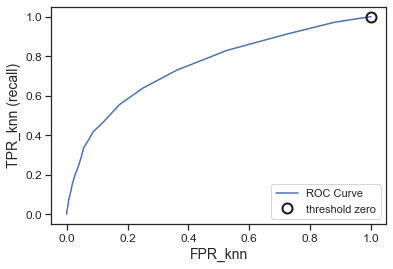

In [254]:
#ROC Curve for Knearest neighbour

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(np.ravel(y_test), final_model2.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn, label="ROC Curve")
plt.xlabel("FPR_knn")
plt.ylabel("TPR_knn (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))
plt.plot(fpr_knn[close_zero], tpr_knn[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [256]:
print(fpr_knn)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.37890708e-04
 3.40208378e-03 6.16627684e-03 1.36083351e-02 1.89240910e-02
 2.72166702e-02 3.84860727e-02 4.78418031e-02 5.61343823e-02
 7.08058686e-02 8.69657665e-02 1.21837125e-01 1.72443121e-01
 2.48777376e-01 3.61046141e-01 5.26259834e-01 7.16776526e-01
 8.80076547e-01 1.00000000e+00]


In [257]:
print(tpr_knn)

[0.         0.00308404 0.00462606 0.01696222 0.03623747 0.07016191
 0.1156515  0.15497301 0.19814958 0.24363917 0.28989977 0.33770239
 0.37316885 0.41711642 0.46877409 0.5535852  0.63685428 0.72860447
 0.82883577 0.90902082 0.97147263 1.        ]


In [258]:
print(thresholds_knn)
print(thresholds_knn.mean())

[2.   1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4
 0.35 0.3  0.25 0.2  0.15 0.1  0.05 0.  ]
0.5681818181818182


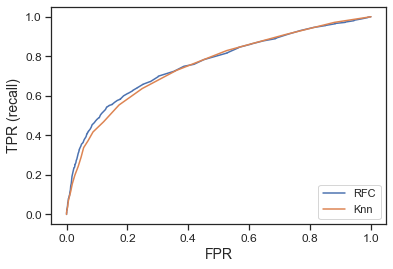

In [263]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.plot(fpr, tpr, label="RFC")
plt.plot(fpr_knn, tpr_knn, label="Knn")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc='lower right')
plt.show()

ROC curve: It seems that both the curves are overlapping on each other and are a bit far from the top left corner. 
Also the ROC_AUC score for Random forest classifier is 0.761 and ROC_AUC score the knn is 0.752. The ROC_AUC for random forest classifer is better than ROC_AUC for knn. Threshold for both of them is coming around 2

#Conclusions:

#Explain your results and choices:
In the data exploration stage, things that checked were datatypes and missing values. Similary graphs were plotted to further understand the features. The bar graphs above have shown the different features for example Sex,Education,Marriage and Pay on how it compares within itself as well as then plotted along with default payment. Some of the observations are that women,single indiviuals,university going students are taking on more credit but at the same time are not defaulting on the payment. Also for the pay feature, it is seen that more indiviuals are using the revolving credit. Similary there is correleation between pay feature and defualt payment. In the next preprocessing step, all the 25 features were kept for analysis. However they were broken down into dependent variable, categorical variable and discrete/numerial variable. 
One hot encode and minmax scaler is performed on the categorical and numerical variable respectively. After train/test split, Elasticnet and SDG regressor are used mean = 0.41 with cv=5. 
Next step, is using the classificaion. Random forest classifer accuracy without hyperparameter is 81.07%. With hyperparameter tuning the accuracy is 82.03%. 
Next Knn classifier the accuracy is 79.37%, with hyperparameter tuning is 80.9%. 
Next ROC_AUC score is calculated and ROC curve is plotted. The ROC_AUC score for random forest classifer = 0.761 and ROC_AUC score for knn = 0.752. ROC_AUC score for random forest classifer is better than knn. Threshold is around 2. 

The model choosen is Random Forest Classifer the accuracy and ROC_AUC is better than knn. Prediction is 82.03%, whether the customer defaults or not next month.


